In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve
from PIL import Image
from skimage import io

# Load Image

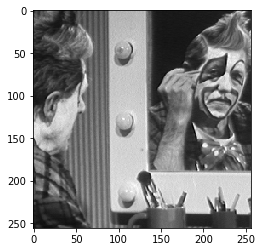

In [2]:
img_path = './dataset/clown.tif'
img = Image.open(img_path)
#print(np.asarray(img).shape)
plt.imshow(img,cmap=plt.get_cmap('gray'))

# Convolve

In [3]:
def Convolve(img,kernel):
    img = np.asarray(img)
    h,w = img.shape[0],img.shape[1]
    
    #################################################################################
    stride = 1
    new_i = 0
    fil_h = kernel.shape[0]
    fil_w = kernel.shape[1]
    new_img = np.zeros((h-fil_h+1,w-fil_w+1))
    #################################################################################
    
    for i in range(h - fil_h+1):
        for j in range(w - fil_w+1):
            im_region = img[i:(i + fil_h), j:(j + fil_w)]
            r = np.multiply(im_region,kernel).sum()
            new_img[i][j] = int(r/fil_h*fil_w)
    return new_img

# Sobel Filter

In [4]:
Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gy = Gx.T
sobel_filter = Gx + Gy

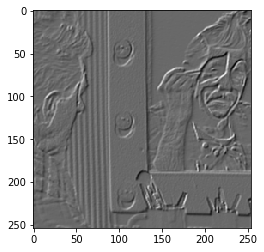

In [5]:
sobel_result = Convolve(img,sobel_filter)
plt.imshow(sobel_result,cmap=plt.get_cmap('gray'))

# Laplacian Filter

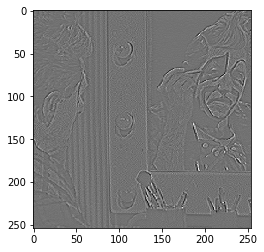

In [6]:
laplace_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
laplacian_result = Convolve(img,laplace_filter)
plt.imshow(laplacian_result,cmap=plt.get_cmap('gray'))

# Comparision with inbuilt function

## Sobel Filter

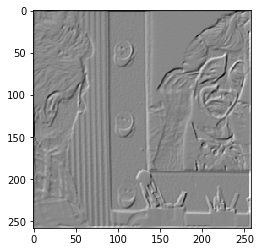

In [7]:
from scipy import signal
sobel_conv = signal.convolve2d(img, sobel_filter)
plt.imshow(sobel_conv,cmap=plt.get_cmap('gray'))

## Laplacian filter

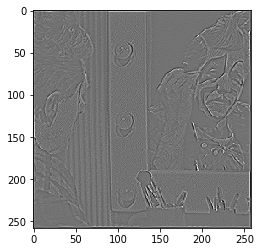

In [8]:
laplacian_conv = signal.convolve2d(img, laplace_filter)
plt.imshow(laplacian_conv,cmap=plt.get_cmap('gray'))